In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

In [2]:
### PROBLEM 1 ###

@njit
def em_step(t, y, dt, f, G):
    
    DW = np.zeros(len(y))
    for i, x in np.ndenumerate(DW):
        DW[i] = np.random.normal()
    
    return y + f(t,y)*dt + np.dot(G(t,y), DW) * np.sqrt(dt)

@njit
def eulermaruyama(t_list, y0, dt_max, f, G):
    y_list = np.zeros((len(t_list), len(y0))) # List of results
    t = 0 # Current simulation time
    y = y0
    
    for i, T in enumerate(t_list):
        
        while(t < T):            
            # Determine time step. Either dt_max, or shorter to
            # hit the next output point.
            dt = min(T-t, dt_max)
            y = em_step(t, y, dt, f, G)
            t += dt
            
        y_list[i,:] = y
        
    return y_list

@njit
def f(t,y):
    return np.zeros(len(y))

@njit
def G(t,y):
    return np.diag(np.sqrt(2*D))

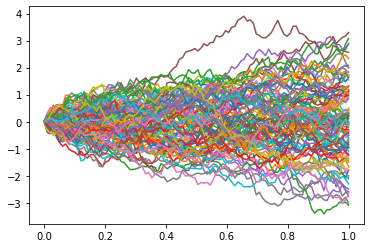

In [3]:
y0 = np.zeros(100)
t = np.linspace(0,1,100)

dt = 1e-4
# Diffusion coefficient of D=1
D = np.array(np.ones(len(y0)))

y = eulermaruyama(t, y0, dt, f, G)

plt.plot(t, y)
plt.show()

In [4]:
# define function that calculates MSD

@njit
def MSD(t,y):
    #Array for saving the msd for each time
    msd = np.zeros(len(t))
    norm = len(y)
    for i in range(len(t)):
        summe = 0
        for j in range(len(y)):
            # Determining msd
            summe += y[i][j]**2 / norm
        msd[i] = summe
    return msd

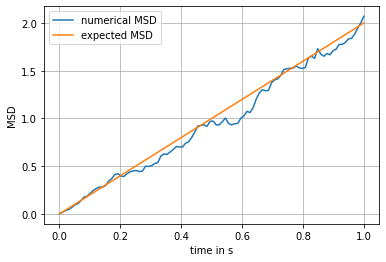

In [5]:
msd = MSD(t,y)

plt.plot(t,msd, label="numerical MSD")
plt.xlabel("time in s")
plt.ylabel("MSD")
plt.plot(t,2*t, label="expected MSD")
plt.legend()
plt.grid()
plt.show()

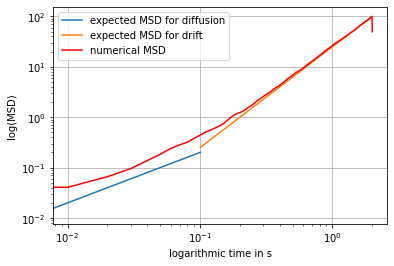

In [6]:
### PROBLEM 2 ###

@njit
def f1(t,y):
    return np.zeros(len(y)) + 5

t1 = np.linspace(0,2,200)

y1 = eulermaruyama(t1, y0, dt, f1, G)
msd1 = MSD(t1,y1)

plt.xlabel("logarithmic time in s")
plt.ylabel("log(MSD)")
plt.loglog(t1[:11],2*t1[:11], label="expected MSD for diffusion")
plt.loglog(t1[10:],t1[10:]**2*5**2, label="expected MSD for drift")
plt.loglog(t1,msd1, label="numerical MSD", color="r")
plt.legend()
plt.grid()
plt.show()

In [56]:
### PROBLEM 3 ###
# I did this problem without njit since I always got an error, so I had
# to redefine the functions

def em_step(t, y, dt, f, G):
    # random tuple that causes noise
    DW = np.random.normal(size=len(y))
    return y + f(t,y)*dt + np.ravel(np.dot(G(t,y), DW)) * np.sqrt(dt)

def eulermaruyama(t_list, y0, dt_max, f, G):
    y_list = np.zeros((len(t_list), len(y0))) # List of results
    t = 0 # Current simulation time
    y = y0
    
    for i, T in enumerate(t_list):
        
        while(t < T):
            dt = min(T-t, dt_max)
            y = em_step(t, y, dt, f, G)
            t += dt
            
        # each i is a time step with t = i*dt
        y_list[i,:] = y
        
    return y_list

def f2(t,y):
    arr = np.array([y[1], -mu*(y[0]*y[0]-1)*y[1]-y[0]])
    return arr

In [67]:
# Defining the analytical solution

def VdP_step(t, y, dt, f):
    return y + f(t,y)*dt

def VdP(t_list, y0, dt_max, f):
    y_list = np.zeros((len(t_list), len(y0))) # List of results
    t = 0 # Current simulation time
    y = y0
    
    for i, T in enumerate(t_list):
        
        while(t < T):
            dt = min(T-t, dt_max)
            y = VdP_step(t, y, dt, f)
            t += dt
            
        y_list[i,:] = y
        
    return y_list

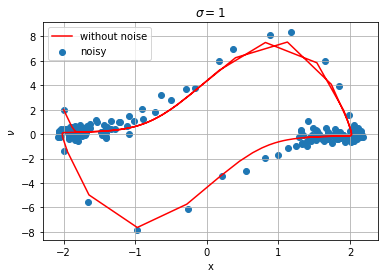

In [66]:
def G1(t,y):
    return np.matrix([[0,0],[0,np.sqrt(2)]])

y01 = np.array([-2,2])
mu = 5
t2 = np.linspace(0,20,200)

y2 = eulermaruyama(t2, y01, dt, f2, G1)
ya = VdP(t2, y01, dt, f2)

plt.xlabel("x")
plt.ylabel(r"$\nu$")
plt.title(r"$\sigma=1$")
plt.scatter(y2[:,0],y2[:,1], label="noisy")
plt.plot(ya[:,0],ya[:,1], label="without noise", color="r")
plt.grid()
plt.legend()
plt.show()

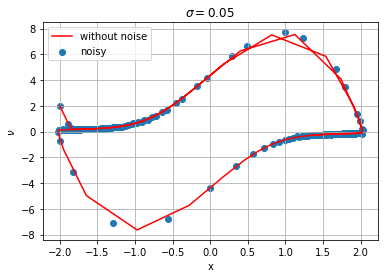

In [63]:
def G2(t,y):
    return np.matrix([[0,0],[0,0.05*np.sqrt(2)]])

y3 = eulermaruyama(t2, y01, dt, f2, G2)

plt.xlabel("x")
plt.ylabel(r"$\nu$")
plt.title(r"$\sigma=0.05$")
plt.scatter(y3[:,0],y3[:,1], label="noisy")
plt.plot(ya[:,0],ya[:,1], label="without noise", color="r")
plt.grid()
plt.legend()
plt.show()

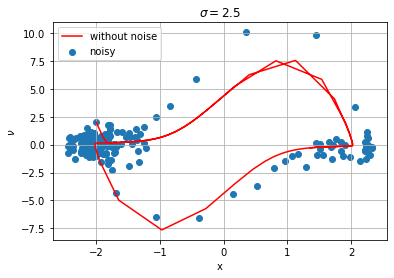

In [64]:
def G3(t,y):
    return np.matrix([[0,0],[0,2.5*np.sqrt(2)]])

y4 = eulermaruyama(t2, y01, dt, f2, G3)

plt.xlabel("x")
plt.ylabel(r"$\nu$")
plt.title(r"$\sigma=2.5$")
plt.scatter(y4[:,0],y4[:,1],label="noisy")
plt.plot(ya[:,0],ya[:,1], label="without noise", color="r")
plt.grid()
plt.legend()
plt.show()

In [ ]:
# We can see that the noisy solution gets closer to the solution without noise for small values of sigma 
# and that it strongly differs from the solution without noise for bigger noise strengths. We can also
# see that we have a slow and a fast phase in the oscillation, since the concentration of points
# is much higher in the parts of the limit cycle where \nu is close to zero.